<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M26_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)
<br>
Elaborado por [Douglas Rizzi](https://www.linkedin.com/in/douglas-rizzi/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv',
                      sep=';',
                      parse_dates=[0],
                      infer_datetime_format=True)

<ipython-input-3-715f8f29aee5>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv',


In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [6]:
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


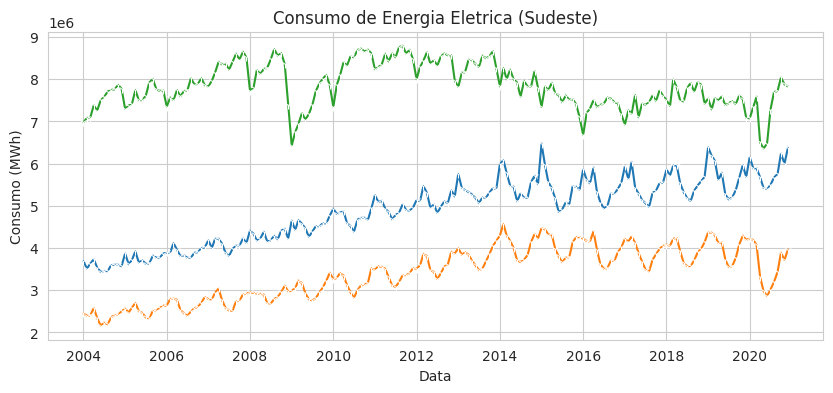

In [7]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia, x='referencia',
                         y='residencial', marker='1')
  grafico = sns.lineplot(data=energia, x='referencia',
                         y='comercial', marker='1')
  grafico = sns.lineplot(data=energia, x='referencia',
                         y='industrial', marker='1')
  grafico.set(title='Consumo de Energia Eletrica (Sudeste)',
              ylabel='Consumo (MWh)',
              xlabel='Data');
  grafico.figure.set_size_inches(10,4)

Responda:

 - Qual é a granularidade da base de dados: <br> Nessa série temporal temos uma granularidade mensal, caracterizada pelo tipo **'MS'** que representa todo o primeiro dia de cada mês.

 - Qual é o intervalo de tempo (min/max): <br> Temos um intervalo de 6.179 dias, ou **17 anos**, iniciando em **01/01/2004** até **01/12/2020**.

In [8]:
# usando o método infer_freq para descobrir a granularidade
energia = energia.set_index(keys=['referencia'])
granularidade = pd.infer_freq(energia.index)
print(granularidade)

MS


In [9]:
# calculando a diferença entre dias, e com isso encontrando seu início e fim
intervalo_e = np.timedelta64(energia.index.max() - energia.index.min(), 'D')
print(intervalo_e)
print(energia.index.max())
print(energia.index.min())

6179 days
2020-12-01 00:00:00
2004-01-01 00:00:00


### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [10]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [11]:
temperatura = pd.read_csv('temperatura.csv',
                          sep=';',
                          parse_dates=[0],
                          infer_datetime_format=True)

<ipython-input-11-f7685d7dc5ea>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv',


In [12]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [13]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


In [14]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   referencia     901 non-null    datetime64[ns]
 1   temp-media-sp  901 non-null    int64         
 2   temp-media-rj  814 non-null    float64       
 3   temp-media-mg  894 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 28.3 KB


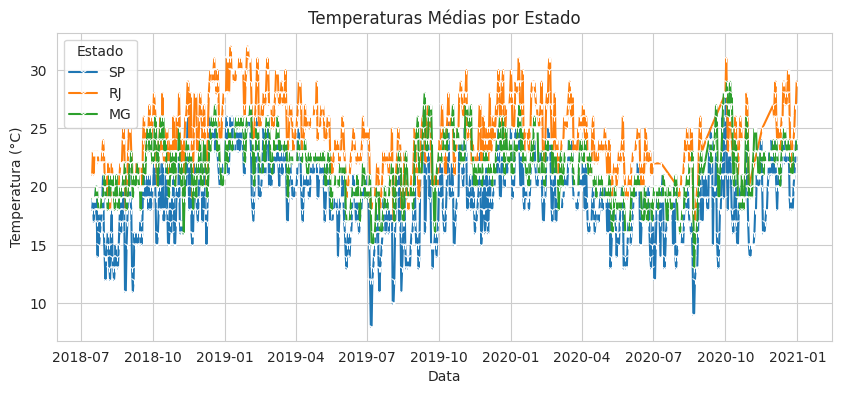

In [15]:

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 4))
    grafico = sns.lineplot(data=temperatura,
                           x='referencia',
                           y='temp-media-sp',
                           marker='1',
                           label='SP')
    grafico = sns.lineplot(data=temperatura,
                           x='referencia',
                           y='temp-media-rj',
                           marker='1',
                           label='RJ')
    grafico = sns.lineplot(data=temperatura,
                           x='referencia',
                           y='temp-media-mg',
                           marker='1',
                           label='MG')
    grafico.set(title='Temperaturas Médias por Estado',
                ylabel='Temperatura (°C)',
                xlabel='Data')
    plt.legend(title='Estado')
    plt.show()


Responda:

 - Qual é a granularidade da base de dados:<br> A granularidade dessa série é diária, representada pelo tipo 'D' segundo o pacote pd.datetime

 - Qual é o intervalo de tempo (min/max): <br> Temos um intervalo de **900** dias, iniciando em **15/07/2018** até **31/12/2020**

In [16]:
# usando o método infer_freq para descobrir a granularidade
temperatura = temperatura.set_index(keys=['referencia']) # atribuição de index
granularidade = pd.infer_freq(temperatura.index)
print(granularidade)

D


In [17]:
# calculando a diferença entre dias, e com isso encontrando seu início e fim
intervalo_t=np.timedelta64(temperatura.index.max()-temperatura.index.min(),'D')
print(intervalo_t)
print(temperatura.index.max())
print(temperatura.index.min())

900 days
2020-12-31 00:00:00
2018-07-15 00:00:00


## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [18]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


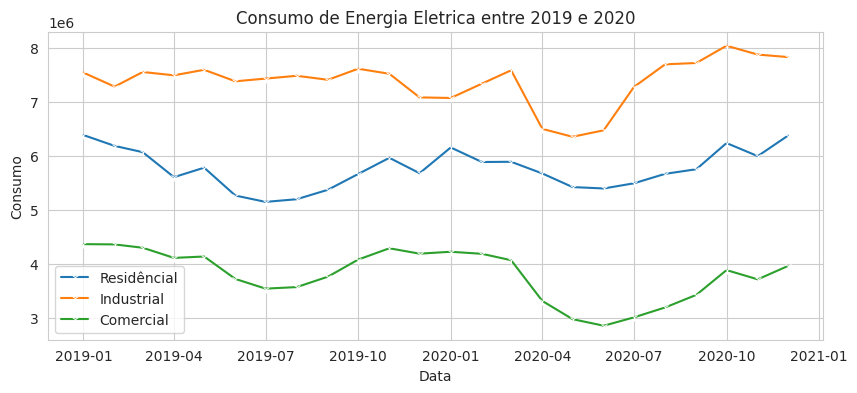

In [19]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia['01-2019':'12-2020'],
                         x='referencia',
                         y='residencial',
                         marker='1',
                         label='Residêncial')
  grafico = sns.lineplot(data=energia['01-2019':'12-2020'],
                         x='referencia',
                         y='industrial',
                         marker='1',
                         label='Industrial')
  grafico = sns.lineplot(data=energia['01-2019':'12-2020'],
                         x='referencia',
                         y='comercial',
                         marker='1',
                         label='Comercial')
  grafico.set(title='Consumo de Energia Eletrica entre 2019 e 2020',
              xlabel='Data',
              ylabel="Consumo");
  grafico.figure.set_size_inches(10,4)

 - **b.** Selecione apenas os dados entre 2019 e 2020.

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [20]:
energia_1 = energia['01-2019':'12-2020']
energia_1.shape

(24, 3)

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [21]:
# já realizei essa atribuição antes para ver a granularidade
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [22]:
# realizando o slicing entre as datas
temperatura_1 = temperatura['01-2019':'12-2020']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [23]:
# verificando o % de null
missing_values = temperatura_1.isnull().mean()*100
print(missing_values)

temp-media-sp     0.000000
temp-media-rj    11.901505
temp-media-mg     0.957592
dtype: float64


In [24]:
# removendo valores null e conferindo o resultado
temperatura_1 = temperatura_1.dropna()
missing_values = temperatura_1.isnull().mean()*100
print(missing_values)

temp-media-sp    0.0
temp-media-rj    0.0
temp-media-mg    0.0
dtype: float64


In [25]:
temperatura_1.shape

(643, 3)

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [26]:
# realizando  a agregação por média
temperatura_1['temp-media'] = (temperatura_1['temp-media-mg']+
                                       temperatura_1['temp-media-rj']+
                                       temperatura_1['temp-media-sp'])/temperatura_1.shape[1]

In [27]:
# deixando no df apenas a temperatura média
temperatura_1 = temperatura_1[['temp-media']]

In [28]:
temperatura_1

,temp-media
referencia,
2019-01-01,23.666667
2019-01-02,25.666667
2019-01-03,27.000000
2019-01-04,25.333333
2019-01-05,24.000000
...,...
2020-12-27,22.333333
2020-12-28,23.000000
2020-12-29,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [29]:
resampled = temperatura_1.resample(rule='M').mean()

In [30]:
resampled.shape

(24, 1)

In [31]:
temperatura_2 = resampled

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

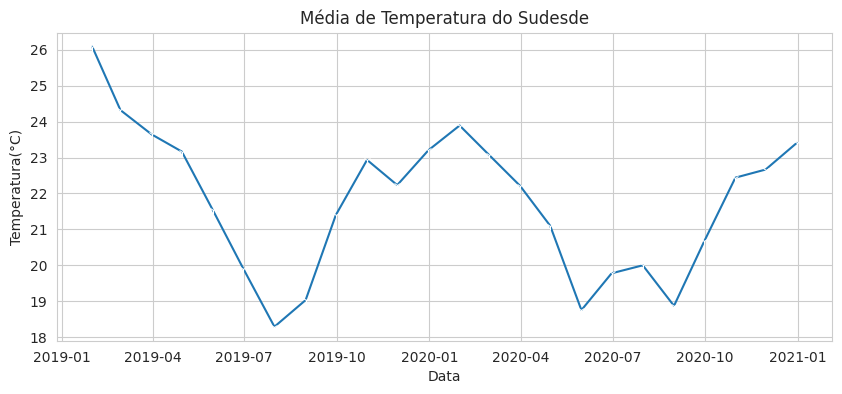

In [32]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=temperatura_2,
                         x='referencia', y='temp-media', marker='1')
  grafico.set(title='Média de Temperatura do Sudesde',
              ylabel='Temperatura(°C)', xlabel='Data')
  grafico.figure.set_size_inches(10,4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

<ipython-input-33-64dac504cd7f>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_1,


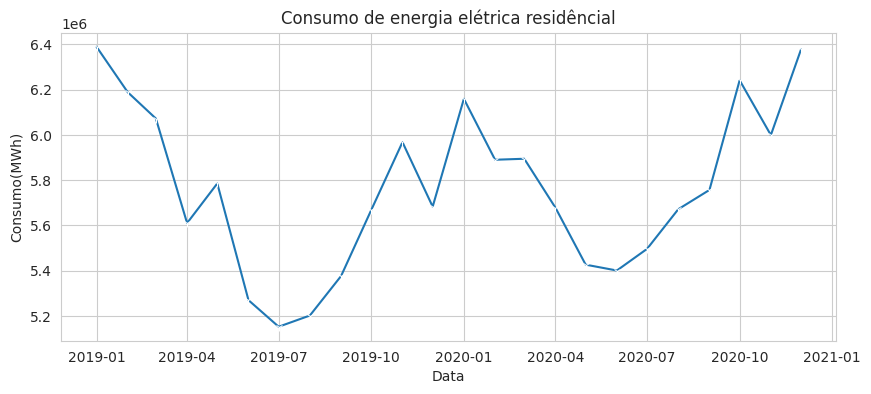

In [33]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia_1,
                         x='referencia',
                         y='residencial',
                         marker='1',
                         palette='pastel')
  grafico.set(title='Consumo de energia elétrica residêncial',
              xlabel='Data',
              ylabel='Consumo(MWh)');
  grafico.figure.set_size_inches(10,4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [34]:
# construindo as variáveis para aplicar o método corrcoef
x = np.array(temperatura_2['temp-media'])
y = np.array(energia_1['residencial'])
corr_temp_res = np.corrcoef(x,y)[0,1]
print(f'A correlação entre temperatura média e consumo de energia elétrica residêncial é de {corr_temp_res:.2f}.')

A correlação entre temperatura média e consumo de energia elétrica residêncial é de 0.82.


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Observamos que a correlanção segundo o coeficiente de Pearson é de **0,82** o que é interpretada como uma **forte** correlação, logo podemos assumir que a variação da temperatura afeta muito o consumo de energia elétrica das residências. Provavelmente isso é decorrente de que no calor o uso de aparelhos de refrigereção seja maior.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

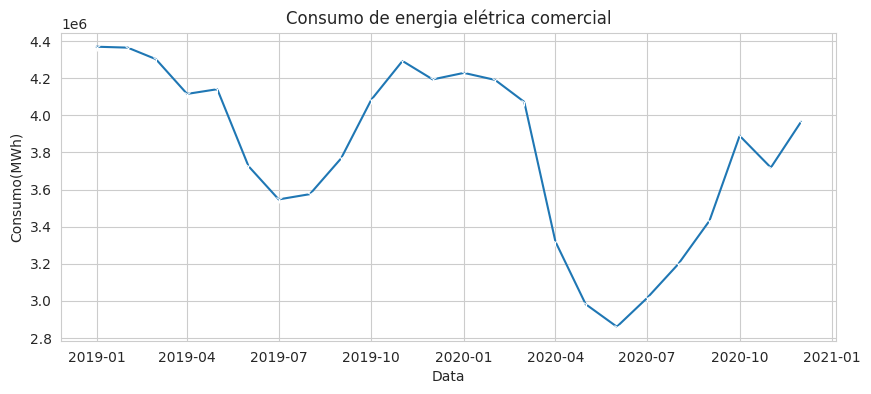

In [35]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia_1,
                         x='referencia',
                         y='comercial',
                         marker='1')
  grafico.set(title='Consumo de energia elétrica comercial',
              xlabel='Data',
              ylabel='Consumo(MWh)');
  grafico.figure.set_size_inches(10,4)

In [36]:
x = np.array(temperatura_2['temp-media'])
y = np.array(energia_1['comercial'])
corr_temp_com = np.corrcoef(x,y)[0,1]
print(f'A correlação entre temperatura média e consumo de energia elétrica comercial é de {corr_temp_com:.2f}.')

A correlação entre temperatura média e consumo de energia elétrica comercial é de 0.82.


**Resposta**: Observamos que a correlanção segundo o coeficiente de Pearson é de **0,82** o que é interpretada como uma **forte** correlação, logo podemos assumir que a variação da temperatura afeta muito o consumo de energia elétrica do comercio. Isso pode ser decorrência de que muito comércios aumentam o uso de refrigeração em seus estabelecimentos, seja pelo quantidade de clientes ou por necessidades técnicas.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

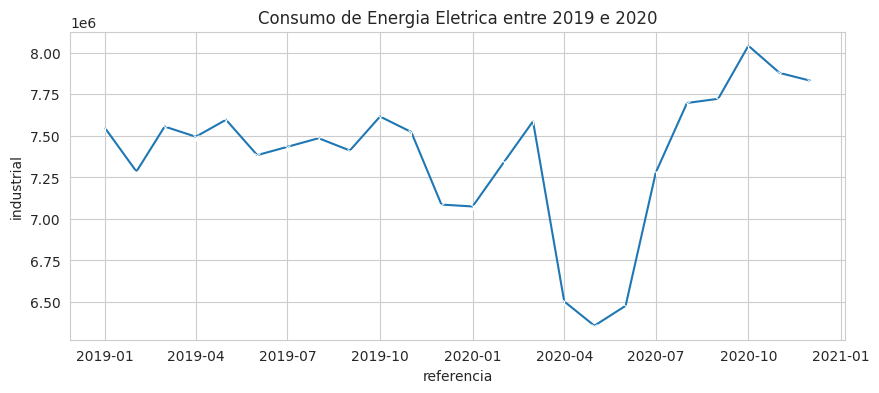

In [37]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia_1,
                         x='referencia',
                         y='industrial',
                         marker='1')
  grafico.set(title='Consumo de Energia Eletrica entre 2019 e 2020');
  grafico.figure.set_size_inches(10,4)

In [38]:
x = np.array(temperatura_2['temp-media'])
y = np.array(energia_1['industrial'])
corr_temp_ind = np.corrcoef(x,y)[0,1]
print(f'A correlação entre temperatura média e consumo de energia elétrica indutrial é de {corr_temp_ind:.2f}.')

A correlação entre temperatura média e consumo de energia elétrica indutrial é de 0.29.


**Resposta**: Observamos que a correlanção segundo o coeficiente de Pearson é de **0,28** o que é interpretada como uma correlação **muito fraca**, logo podemos assumir que a variação da temperatura afeta muito pouco o consumo das indústrias. Podemos associar essa fraca relação, por exemplo, do planejamento de longo prazo que as indústrias fazem pra que sua operação ocorra normalmente em qualquer período do ano, havendo muito pouco intereferrência do clima.

---